# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# Get the ride counts for each city by city type                             
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
# Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
# Get the total fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
# Calculate the average fare per ride for each city type
average_fare_per_ride = total_fares / total_rides 
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
# Calculate the average fare per driver for each city type
average_fare_per_driver = total_fares / total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
# Create DataFrame from data collected by city type
#pyber_summary_df = pd.DataFrame([total_rides, index=cols), (total_drivers, index=cols), (total_fares, index=cols), (average_fare_per_ride, index=cols), (average_fare_per_driver, index=cols])
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides, 
                                 "Total Drivers": total_drivers, 
                                 "Total Fares": total_fares, 
                                 "Average Fare per Ride": average_fare_per_ride, 
                                 "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns to have 1000 commas and dollar signs where needed
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# Show DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4.256850e+12,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
weekly_fare_totals = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
weekly_fare_totals

date              type    
2019-01-01 0:08   Urban       37.91
2019-01-01 0:46   Suburban    47.74
2019-01-01 12:32  Suburban    25.56
2019-01-01 14:40  Urban        5.42
2019-01-01 14:42  Urban       12.31
                              ...  
2019-05-08 1:54   Urban       32.69
2019-05-08 2:31   Urban       41.33
2019-05-08 4:20   Urban       21.99
2019-05-08 4:39   Urban       18.45
2019-05-08 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
weekly_fare_totals = weekly_fare_totals.reset_index()
weekly_fare_totals

,date,type,fare
0,2019-01-01 0:08,Urban,37.91
1,2019-01-01 0:46,Suburban,47.74
2,2019-01-01 12:32,Suburban,25.56
3,2019-01-01 14:40,Urban,5.42
4,2019-01-01 14:42,Urban,12.31
...,...,...,...
2359,2019-05-08 1:54,Urban,32.69
2360,2019-05-08 2:31,Urban,41.33
2361,2019-05-08 4:20,Urban,21.99
2362,2019-05-08 4:39,Urban,18.45


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_date_type_df = weekly_fare_totals.pivot(index='date', columns='type', values='fare')
fare_by_date_type_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54,NaN,NaN,32.69
2019-05-08 2:31,NaN,NaN,41.33
2019-05-08 4:20,NaN,NaN,21.99


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_date_df = fare_by_date_type_df.loc['2019-01-01':'2019-04-29']
fare_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_by_date_df.index = pd.to_datetime(fare_by_date_df.index)
fare_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_week_df = fare_by_date_df.resample('W').sum()
fares_by_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<Figure size 1440x720 with 0 Axes>

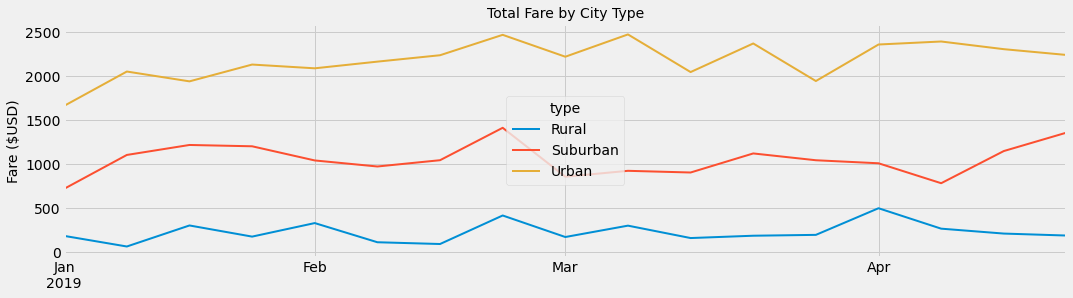

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# create plot
#Change figure size
plt.figure(figsize=(20,10))
fares_by_week_df.plot(figsize = (16,4), linewidth = 2)
plt.legend(loc='center', title = 'type')

# Add labels to axis
plt.ylabel("Fare ($USD)", fontsize=14)
plt.xlabel(None)

# Add title to figure
plt.title("Total Fare by City Type", fontsize=14)

# Save image to file
plt.savefig("analysis/PyBer_fare_summary.png", bbox_inches = "tight")



## Additional analysis of the PyBer dataset

Determine the average fare per driver per city and create a scatterplot of the data

In [20]:
# Create a DataFrame of each city type
urban_type_df = pyber_data_df[pyber_data_df["type"]=='Urban']
suburban_type_df = pyber_data_df[pyber_data_df["type"]=='Suburban']
rural_type_df = pyber_data_df[pyber_data_df["type"]=='Rural']
rural_type_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4.018030e+12,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4.256850e+12,4,Rural


In [21]:
# Create dataframes containing the total rides per city
urban_rides_by_city = urban_type_df.groupby(['city']).count()['ride_id']
suburban_rides_by_city = suburban_type_df.groupby(['city']).count()['ride_id']
rural_rides_by_city = rural_type_df.groupby(['city']).count()['ride_id']
rural_rides_by_city

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [22]:
# Create dataframes containing average fare by city
urban_avg_fares_by_city = urban_type_df.groupby(['city']).mean()['fare']
suburban_avg_fares_by_city = suburban_type_df.groupby(['city']).mean()['fare']
rural_avg_fares_by_city = rural_type_df.groupby(['city']).mean()['fare']
rural_avg_fares_by_city

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [23]:
# create dataframes for the number of driver per city
urban_city_data_df = city_data_df[city_data_df['type']=='Urban']
suburban_city_data_df =city_data_df[city_data_df['type']=='Suburban']
rural_city_data_df = city_data_df[city_data_df['type']=='Rural']
urban_driver_by_city = urban_city_data_df.groupby(['city']).sum()['driver_count']
suburban_driver_by_city = suburban_city_data_df.groupby(['city']).sum()['driver_count']
rural_driver_by_city = rural_city_data_df.groupby(['city']).sum()['driver_count']
rural_driver_by_city.reset_index

<bound method Series.reset_index of city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64>

In [24]:
# create dataframes for total fare per city
urban_fares_by_city = urban_type_df.groupby(['city']).sum()['fare']
suburban_fares_by_city = suburban_type_df.groupby(['city']).sum()['fare']
rural_fares_by_city = rural_type_df.groupby(['city']).sum()['fare']
print(rural_fares_by_city)

city
Bradshawfurt         400.64
Garzaport             72.37
Harringtonfort       200.82
Jessicaport          216.08
Lake Jamie           206.15
Lake Latoyabury      286.68
Michaelberg          419.97
New Ryantown         259.67
Newtonview           146.98
North Holly          262.17
North Jaime          246.42
Penaborough          176.23
Randallchester       148.71
South Jennifer       246.85
South Marychester    334.96
South Saramouth      144.64
Taylorhaven          253.58
West Heather         305.01
Name: fare, dtype: float64


In [25]:
# Create new dataframes of the fares and drivers per city
rural_fares_drivers_per_city_df = pd.DataFrame({"Total Fares":rural_fares_by_city,
                                                "Total Drivers":rural_driver_by_city, 
                                                "Total Rides":rural_rides_by_city, 
                                                "Avg Fare":rural_avg_fares_by_city})
urban_fares_drivers_per_city_df = pd.DataFrame({"Total Fares":urban_fares_by_city,
                                                "Total Drivers":urban_driver_by_city, 
                                                "Total Rides":urban_rides_by_city, 
                                                "Avg Fare":urban_avg_fares_by_city})
suburban_fares_drivers_per_city_df = pd.DataFrame({"Total Fares":suburban_fares_by_city,
                                                "Total Drivers":suburban_driver_by_city, 
                                                "Total Rides":suburban_rides_by_city, 
                                                "Avg Fare":suburban_avg_fares_by_city})

rural_fares_drivers_per_city_df

,Total Fares,Total Drivers,Total Rides,Avg Fare
city,,,,
Bradshawfurt,400.64,7,10,40.064000
Garzaport,72.37,7,3,24.123333
Harringtonfort,200.82,4,6,33.470000
Jessicaport,216.08,1,6,36.013333
Lake Jamie,206.15,4,6,34.358333
Lake Latoyabury,286.68,2,11,26.061818
Michaelberg,419.97,6,12,34.997500
New Ryantown,259.67,2,6,43.278333
Newtonview,146.98,1,4,36.745000


In [26]:
urban_fares_drivers_per_city_df

,Total Fares,Total Drivers,Total Rides,Avg Fare
city,,,,
Amandaburgh,443.55,12,18,24.641667
Barajasview,557.31,26,22,25.332273
Carriemouth,764.49,52,27,28.314444
Christopherfurt,661.55,41,27,24.501852
Deanville,491.01,49,19,25.842632
...,...,...,...,...
West Patrickchester,451.73,25,16,28.233125
West Robert,778.84,39,31,25.123871
West Samuelburgh,544.19,73,25,21.767600


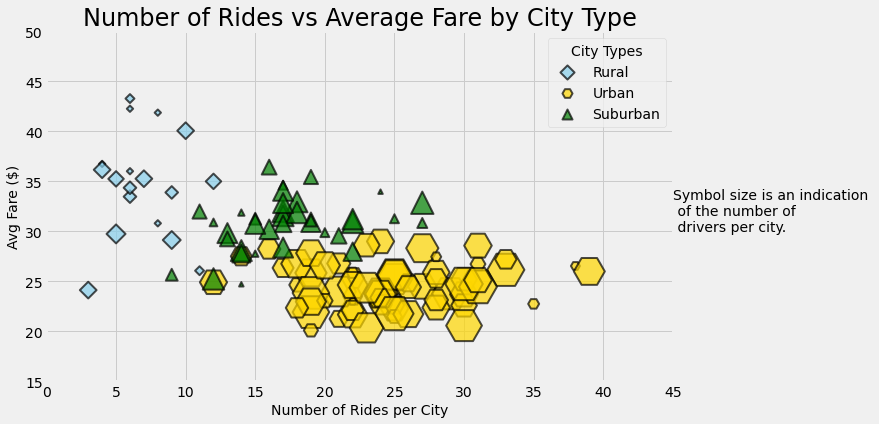

In [27]:
# Create scatterplot of the ride data by type and average ride
plt.subplots(figsize=(10,6))
plt.scatter(rural_fares_drivers_per_city_df["Total Rides"], 
            rural_fares_drivers_per_city_df["Avg Fare"], 
            s=20*(rural_fares_drivers_per_city_df["Total Drivers"]),
            marker='D',
            c="skyblue", 
            edgecolor="black", 
            linewidth=2, 
            alpha=0.7, 
            label="Rural")
plt.scatter(urban_fares_drivers_per_city_df["Total Rides"], 
            urban_fares_drivers_per_city_df["Avg Fare"], 
            s=20*(urban_fares_drivers_per_city_df["Total Drivers"]),
            marker="H",
            c="gold", 
            edgecolor="black", 
            linewidth=2, 
            alpha=0.7, 
            label="Urban")
plt.scatter(suburban_fares_drivers_per_city_df["Total Rides"], 
            suburban_fares_drivers_per_city_df["Avg Fare"], 
            s=20*(suburban_fares_drivers_per_city_df["Total Drivers"]),
            marker="^",
            c="green", 
            edgecolor="black", 
            linewidth=2, 
            alpha=0.7, 
            label="Suburban")
# Add title and axis labels
plt.title("Number of Rides vs Average Fare by City Type", fontsize=24)
plt.xlabel("Number of Rides per City", fontsize=14)
plt.ylabel("Avg Fare ($)", fontsize=14)
plt.xlim(0, 45)
plt.ylim(15, 50)
lgnd = plt.legend(fontsize='14', mode="Expanded", 
           scatterpoints=1, loc="best", 
           title="City Types")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
lgnd.get_title().set_fontsize(14)
# Indicate the meaning of the size of the circles
plt.text(45,30, "Symbol size is an indication \n of the number of \n drivers per city.", fontsize='14')
plt.savefig("analysis/Average_Fare_by_Ride_Summary.png", bbox_inches = "tight")

In [28]:
# View rural data discriptive statistics
rural_type_df["fare"].describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [ ]:
# Create histogram of rural fares
# Create bins for fare data
plt.subplots(figsize=(10,6))
rural_bins = [0, 14, 28, 42, 56, 70]
plt.hist(rural_type_df["fare"], bins=rural_bins, density=True, facecolor='skyblue', rwidth=0.5)
plt.xlabel('Fares ($)')
plt.ylabel('Probability')
plt.title('Histogram of Rural Ride Fares')
plt.xlim(5, 70)
plt.ylim(0, 0.03)
plt.grid(True)
plt.savefig('analysis/Histogram_Rural_Fares.png', bbox_inches = "tight")

In [ ]:
# View urban data discriptive statistics
urban_type_df["fare"].describe()

In [ ]:
# Create histogram of urban fares
# Create bins for fare data
plt.subplots(figsize=(10,6))
urban_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.hist(urban_type_df["fare"], bins=urban_bins, density=True, facecolor='gold', rwidth=0.7)
plt.xlabel('Fares ($)')
plt.ylabel('Probability')
plt.title('Histogram of Urban Ride Fares')
plt.xlim(0, 50)
plt.ylim(0, 0.03)
plt.grid(True)
plt.savefig('analysis/Histogram_Urban_Fares.png', bbox_inches = "tight")

In [ ]:
# View suburban data discriptive statistics
suburban_type_df["fare"].describe()

In [ ]:
# Create histogram of urban fares
# Create bins for fare data
plt.subplots(figsize=(10,6))
suburban_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.hist(suburban_type_df["fare"], bins=suburban_bins, density=True, facecolor='g', rwidth=0.7)
plt.xlabel('Fares ($)')
plt.ylabel('Probability')
plt.title('Histogram of Suburban Ride Fares')
plt.xlim(5, 55)
plt.ylim(0, 0.04)
plt.grid(True)
plt.savefig('analysis/Histogram_Suburban_Fares.png', bbox_inches = "tight")

In [ ]:
# View suburban data discriptive statistics
pyber_data_df["fare"].describe()


In [ ]:
# Create histogram of urban fares
# Create bins for fare data
plt.subplots(figsize=(10,6))
overall_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 65]
plt.hist(pyber_data_df["fare"], bins=overall_bins, density=True, facecolor='b', rwidth=0.7)
plt.xlabel('Fares ($)')
plt.ylabel('Probability')
plt.title('Histogram of All PyBer Ride Fares')
plt.xlim(0, 60)
plt.ylim(0, 0.04)
plt.grid(True)
plt.savefig('analysis/Histogram_Overall_PyBer_Fares.png', bbox_inches = "tight")

In [ ]:
# Create box plot graphs for data summary

# Draw a vertical boxplot grouped 
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="type", y="fare", data=pyber_data_df, width=.25)
# by a categorical variable:
sns.set_style("whitegrid")
ax.set(ylabel="Fare ($)")
ax.set(xlabel="City Type")
plt.savefig('analysis/Boxplots__PyBer_Fares_per_city.png', bbox_inches = "tight")